In [1]:
!pip install qutip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 8.6 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for qutip: filename=qutip-5.0.4-cp39-cp39-macosx_10_9_x86_64.whl size=8333413 sha256=a4a02a2b79d5f3c0326f08430e5b03b710bda3541f48dbb5ac7bcc8d6841088b
  Stored in directory: /Users/ethannussinov/Library/Caches/pip/wheels/b4/98/af/638f9322fb6f48b122a10c32fbea60d13682bd7af76135e615
Successfully built qutip


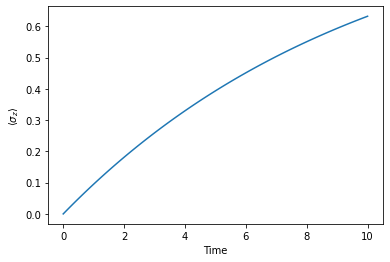

Density matrix at t = 0.0:
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.   0.   0.   0. ]
 [ 0.   0.5 -0.5  0. ]
 [ 0.  -0.5  0.5  0. ]
 [ 0.   0.   0.   0. ]]

Density matrix at t = 0.10101010101010101:
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.01005017  0.          0.          0.        ]
 [ 0.          0.49497492 -0.45655043  0.        ]
 [ 0.         -0.45655043  0.49497492  0.        ]
 [ 0.          0.          0.          0.        ]]

Density matrix at t = 0.20202020202020202:
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.01999933  0.          0.          0.        ]
 [ 0.          0.49000034 -0.41687682  0.        ]
 [ 0.         -0.41687682  0.49000034  0.        ]
 [ 0.          0.          0.          0.        ]]



In [10]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt

# Define Pauli matrices for two-qubit system
sx = sigmax()  # Pauli-X for one qubit
sy = sigmay()  # Pauli-Y for one qubit
sz = sigmaz()  # Pauli-Z for one qubit
sm = destroy(2)  # Lowering operator (|1><0|)

# Tensor product for two-qubit operators
# Bell state: Psi- = (|01> - |10>) / sqrt(2)
psi_bell = (tensor(basis(2, 0), basis(2, 1)) - tensor(basis(2, 1), basis(2, 0))).unit()

# Initial state
rho0 = psi_bell * psi_bell.dag()  # Density matrix of the initial state

# Hamiltonian (can be set to zero for pure decoherence)
H = 0 * tensor(sx, sx)  # No unitary evolution (just decoherence here)

# Define Lindblad operators (noise)
# Decoherence (dephasing)
L_dephasing_1 = np.sqrt(0.2) * tensor(sz, qeye(2))
L_dephasing_2 = np.sqrt(0.2) * tensor(qeye(2), sz)

# Amplitude damping
L_amplitude_1 = np.sqrt(0.1) * tensor(sm, qeye(2))
L_amplitude_2 = np.sqrt(0.1) * tensor(qeye(2), sm)

# Time points for evolution
tlist = np.linspace(0, 10, 100)

# Solve the Lindblad master equation
result = mesolve(H, rho0, tlist, [L_dephasing_1, L_dephasing_2, L_amplitude_1, L_amplitude_2])

# Get the density matrices at each time step
rho_t = result.states

# Plot the evolution of the expectation value of some observable (optional)
expectations = expect(tensor(sz, qeye(2)), rho_t)
plt.plot(tlist, expectations)
plt.xlabel("Time")
plt.ylabel(r"$\langle \sigma_z \rangle$")
plt.show()

# Display the first few density matrices as an example
for i in range(3):
    print(f"Density matrix at t = {tlist[i]}:\n{rho_t[i]}\n")
print('DEBUG BELOW')



In [9]:
# Calculate concurrence for each density matrix
concurrences = [concurrence(rho) for rho in rho_t]

# Classify as entangled (concurrence > 0) or separable (concurrence = 0)
entanglement_labels = [1 if conc > 0 else 0 for conc in concurrences]

# Print the first few concurrences and labels
for i in range(10):
    print(f"Time: {tlist[i]:.2f}, Concurrence: {concurrences[i]:.3f}, Label (Entangled: 1, Separable: 0): {entanglement_labels[i]}")

Time: 0.00, Concurrence: 1.000, Label (Entangled: 1, Separable: 0): 1
Time: 0.10, Concurrence: 0.913, Label (Entangled: 1, Separable: 0): 1
Time: 0.20, Concurrence: 0.834, Label (Entangled: 1, Separable: 0): 1
Time: 0.30, Concurrence: 0.761, Label (Entangled: 1, Separable: 0): 1
Time: 0.40, Concurrence: 0.695, Label (Entangled: 1, Separable: 0): 1
Time: 0.51, Concurrence: 0.635, Label (Entangled: 1, Separable: 0): 1
Time: 0.61, Concurrence: 0.580, Label (Entangled: 1, Separable: 0): 1
Time: 0.71, Concurrence: 0.529, Label (Entangled: 1, Separable: 0): 1
Time: 0.81, Concurrence: 0.483, Label (Entangled: 1, Separable: 0): 1
Time: 0.91, Concurrence: 0.441, Label (Entangled: 1, Separable: 0): 1


In [7]:
# Calculate expectation values of Pauli matrices for each qubit
def calculate_expectation_values(rho):
    # Pauli matrices for the first and second qubits
    sx1, sy1, sz1 = tensor(sigmax(), qeye(2)), tensor(sigmay(), qeye(2)), tensor(sigmaz(), qeye(2))
    sx2, sy2, sz2 = tensor(qeye(2), sigmax()), tensor(qeye(2), sigmay()), tensor(qeye(2), sigmaz())
    
    # Calculate expectation values for each Pauli matrix
    exp_sx1 = expect(sx1, rho)
    exp_sy1 = expect(sy1, rho)
    exp_sz1 = expect(sz1, rho)
    exp_sx2 = expect(sx2, rho)
    exp_sy2 = expect(sy2, rho)
    exp_sz2 = expect(sz2, rho)
    
    return [exp_sx1, exp_sy1, exp_sz1, exp_sx2, exp_sy2, exp_sz2]

# Update the feature extraction function to include expectation values
def extract_features_with_expectations(rho):
    # Calculate basic features: purity, entropy, eigenvalues
    purity = (rho * rho).tr().real  # Purity of the state
    entropy = entropy_vn(rho).real  # Von Neumann entropy
    eigvals = rho.eigenenergies()   # Eigenvalues of the density matrix
    
    # Calculate expectation values of Pauli matrices
    expectation_values = calculate_expectation_values(rho)
    
    # Combine all features: purity, entropy, eigenvalues, and expectation values
    return [purity, entropy] + list(eigvals) + expectation_values

# Extract features (with expectation values) for each density matrix in the time evolution
features_with_expectations = [extract_features_with_expectations(rho) for rho in rho_t]

# Convert to NumPy array for easier handling in machine learning
features_with_expectations = np.array(features_with_expectations)

# Print the first few feature sets with expectation values
print(f"Features for first density matrix (with expectation values):\n{features_with_expectations[0]}")


Features for first density matrix (with expectation values):
[ 1. -0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_with_expectations, entanglement_labels, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print(classification_report(y_test, y_pred, target_names=["Separable", "Entangled"]))


Accuracy: 1.00


ValueError: Number of classes, 1, does not match size of target_names, 2. Try specifying the labels parameter